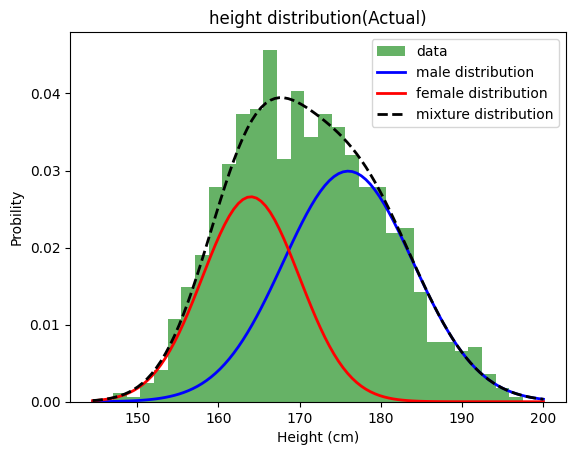

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 生成数据
np.random.seed(0)
N = 1000  # 总样本数
male_ratio = 0.6
female_ratio = 0.4
male_count = int(N * male_ratio)
female_count = int(N * female_ratio)

mu_M, sigma_M = 176, 8
mu_F, sigma_F = 164, 6

male_heights = np.random.normal(mu_M, sigma_M, male_count)
female_heights = np.random.normal(mu_F, sigma_F, female_count)
data = np.concatenate([male_heights, female_heights])

# 绘制实际分布的图像
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_male = male_ratio * norm.pdf(x, mu_M, sigma_M)
p_female = female_ratio * norm.pdf(x, mu_F, sigma_F)
p_actual = p_male + p_female
plt.plot(x, p_male, 'b', linewidth=2, label='male distribution')
plt.plot(x, p_female, 'r', linewidth=2, label='female distribution')
plt.plot(x, p_actual, 'k--', linewidth=2, label='mixture distribution')
plt.legend(loc='upper right')
plt.xlabel('Height (cm)')
plt.ylabel('Probility')
plt.title('height distribution(Actual)')
plt.show()


**下面是EM算法的代码部分**

Iteration 1: mu1 = 176.95, mu2 = 165.01, sigma1 = 7.53, sigma2 = 6.51, pi = 0.49
Iteration 2: mu1 = 177.05, mu2 = 164.97, sigma1 = 7.60, sigma2 = 6.33, pi = 0.49
Iteration 3: mu1 = 177.10, mu2 = 164.91, sigma1 = 7.57, sigma2 = 6.24, pi = 0.49
Iteration 4: mu1 = 177.15, mu2 = 164.84, sigma1 = 7.53, sigma2 = 6.19, pi = 0.49
Iteration 5: mu1 = 177.18, mu2 = 164.79, sigma1 = 7.48, sigma2 = 6.14, pi = 0.49
Iteration 6: mu1 = 177.21, mu2 = 164.73, sigma1 = 7.44, sigma2 = 6.11, pi = 0.49
Iteration 7: mu1 = 177.23, mu2 = 164.69, sigma1 = 7.41, sigma2 = 6.07, pi = 0.49
Iteration 8: mu1 = 177.25, mu2 = 164.65, sigma1 = 7.38, sigma2 = 6.05, pi = 0.49
Iteration 9: mu1 = 177.26, mu2 = 164.62, sigma1 = 7.36, sigma2 = 6.02, pi = 0.49
Iteration 10: mu1 = 177.27, mu2 = 164.59, sigma1 = 7.35, sigma2 = 6.00, pi = 0.49
Iteration 11: mu1 = 177.27, mu2 = 164.56, sigma1 = 7.33, sigma2 = 5.99, pi = 0.50
Iteration 12: mu1 = 177.27, mu2 = 164.54, sigma1 = 7.32, sigma2 = 5.97, pi = 0.50
Iteration 13: mu1 = 177.2

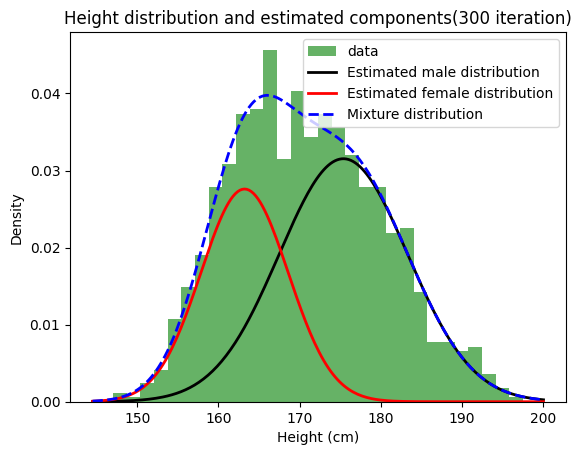

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 生成数据
np.random.seed(0)
N = 1000  # 总样本数
male_ratio = 0.6
female_ratio = 0.4
male_count = int(N * male_ratio)
female_count = int(N * female_ratio)

mu_M, sigma_M = 176, 8
mu_F, sigma_F = 164, 6

male_heights = np.random.normal(mu_M, sigma_M, male_count)
female_heights = np.random.normal(mu_F, sigma_F, female_count)
data = np.concatenate([male_heights, female_heights])

# 初始参数
mu1, mu2 = np.mean(data) + 10, np.mean(data) - 10
#mu1, mu2 = 100, 200
sigma1, sigma2 = np.std(data), np.std(data)
pi = 0.5

# EM 算法
def e_step(data, mu1, mu2, sigma1, sigma2, pi):
    gamma = pi * norm.pdf(data, mu1, sigma1)
    gamma /= gamma + (1 - pi) * norm.pdf(data, mu2, sigma2)
    return gamma

def m_step(data, gamma):
    N1 = np.sum(gamma)
    N2 = len(data) - N1
    mu1 = np.sum(gamma * data) / N1
    mu2 = np.sum((1 - gamma) * data) / N2
    sigma1 = np.sqrt(np.sum(gamma * (data - mu1) ** 2) / N1)
    sigma2 = np.sqrt(np.sum((1 - gamma) * (data - mu2) ** 2) / N2)
    pi = N1 / len(data)
    return mu1, mu2, sigma1, sigma2, pi

def em_algorithm(data, mu1, mu2, sigma1, sigma2, pi, max_iter=300, tol=1e-6):
    for i in range(max_iter):
        gamma = e_step(data, mu1, mu2, sigma1, sigma2, pi)
        mu1_new, mu2_new, sigma1_new, sigma2_new, pi_new = m_step(data, gamma)
        print(f"Iteration {i+1}: mu1 = {mu1_new:.2f}, mu2 = {mu2_new:.2f}, sigma1 = {sigma1_new:.2f}, sigma2 = {sigma2_new:.2f}, pi = {pi_new:.2f}")
        if np.abs(mu1 - mu1_new) < tol and np.abs(mu2 - mu2_new) < tol and \
           np.abs(sigma1 - sigma1_new) < tol and np.abs(sigma2 - sigma2_new) < tol and \
           np.abs(pi - pi_new) < tol:
            break
        mu1, mu2, sigma1, sigma2, pi = mu1_new, mu2_new, sigma1_new, sigma2_new, pi_new
    return mu1, mu2, sigma1, sigma2, pi

# 运行 EM 算法
mu1, mu2, sigma1, sigma2, pi = em_algorithm(data, mu1, mu2, sigma1, sigma2, pi)

# 显示结果
print(f"\n估计的参数：")
print(f"mu1 = {mu1:.2f}, sigma1 = {sigma1:.2f}, pi = {pi:.2f}")
print(f"mu2 = {mu2:.2f}, sigma2 = {sigma2:.2f}, 1-pi = {1-pi:.2f}")

# 对比真实参数
print(f"\n真实参数：")
print(f"mu_M = {mu_M}, sigma_M = {sigma_M}, male_ratio = {male_ratio}")
print(f"mu_F = {mu_F}, sigma_F = {sigma_F}, female_ratio = {female_ratio}")

# 可视化
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p1 = pi * norm.pdf(x, mu1, sigma1)
p2 = (1 - pi) * norm.pdf(x, mu2, sigma2)
p_mixture = p1 + p2
plt.plot(x, p1, 'k', linewidth=2, label='Estimated male distribution')
plt.plot(x, p2, 'r', linewidth=2, label='Estimated female distribution')
plt.plot(x, p_mixture, 'b--', linewidth=2, label='Mixture distribution')
plt.legend(loc='upper right')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.title('Height distribution and estimated components(300 iteration)')
plt.show()
